## Michaela Allen $-$ PHYS 513: Homework 1

1. For your computer system write a program to estimate the number of floating-point operations (e.g., multiplications) that can bep be performed in one second. You can use the `time.time()` function as a stop watch.

In [9]:
import time
from numpy import arange

t1 = time.time() # starting time

a = 2.
b = 2.

multiplications = 10**7

for i in range(multiplications):
    a = a*b
    
t2 = time.time()

print('elapsed time =', t2-t1, 's')

elapsed time = 0.7541260719299316 s


If we increase multiplications to $10^8$, the time elapsed becomes ~7 seconds. So, the computer system can do approximately 10 million multiplications in one second. <br>

---

2. Modify the **orthog** program so that it can handle vectors of any length.  Your program should detect and gracefully handle erroneous inputs such as vectors of unequal length.

In [52]:
# 2: Orthog - check for orthogonality of two vectors

import numpy as np

# initialize vectors a and b whilst also checking to see if vectors are the same length-- if not, input new vectors:

while True:
    try: 
        a = eval(input("Enter the first vector: "))
        b = eval(input("Enter the second vector: ")) 
    
    except ValueError:
        print('Vectors are of unequal length, try again!')
        continue
    
    if len(a) != len(b):
        print('Vectors are of unequal length, try again!')
        continue
 
    else: 
        # vectors are the same length
        break
    
# compute dot product and print results:    

a_dot_b = np.dot(a,b)
    
if a_dot_b == 0:
    print("Vectors are orthogonal")
else:
    print("Vectors are not orthogonal")
    print("Dot product = ",a_dot_b)

Enter the first vector: [1,2,3]
Enter the second vector: [1,2]
Vectors are of unequal length, try again!
Enter the first vector: [1,2,3]
Enter the second vector: [1,2,2]
Vectors are not orthogonal
Dot product =  11


---

3. Modify the **orthog** program so that it accepts a pair of theree-dimensional vectors and outputs a unit vector that is orthogonal to the input vectors.

In [30]:
# 3 - Orthog

import numpy as np

# initialize vectors a and b whilst also checking to see if vectors are the same length-- if not, input new vectors:

while True:
    a = eval(input("Enter the first vector: "))
    b = eval(input("Enter the second vector: "))
    
    if len(a) != len(b):
        print('Vectors are of unequal length, try again!')
        continue
        
    else: 
        # vectors are the same length
        break

# compute cross product and print results:    

a_cross_b = np.cross(a,b)

# compute unit vector:

unit_vector = a_cross_b / np.linalg.norm(a_cross_b)
print('Unit vector orthogonal to a and b:', unit_vector)

Enter the first vector: [0,1,0]
Enter the second vector: [1,0,0]
Unit vector orthogonal to a and b: [ 0.  0. -1.]


4. Modify the **orthog** program so that if the second vector is not orthogonal to the first, the program computes a new vector that is orthogonal to the first vector, has the same length as the second vector, and is in the same plane as the two input vectors. This orthogonalization is often used with eigenvectors and is commonly performed using the Gram-Schmidt procedure.

In [57]:
# 4 - Orthog

import numpy as np

# initialize vectors a and b whilst also checking to see if vectors are the same length-- if not, input new vectors:

while True:
    a = eval(input("Enter the first vector: "))
    b = eval(input("Enter the second vector: "))
    
    if len(a) != len(b):
        print('Vectors are of unequal length, try again!')
        continue
        
    else: 
        # vectors are the same length
        break

# define a new vector:

new_vector = np.array([0, 0, 1,])

# compute dot product of a and b and check if orthogonal:
# if not, compute cross product of a and new vector and calculate another new vector that is orthogonal
# and in same plane:

a_dot_b = np.dot(a,b)

if a_dot_b == 0:
    print("Vectors are orthogonal")

else:
    a_cross_new_vector = np.cross(a, new_vector) 
    new_vector2 =  a_cross_new_vector * b

    
print("Orthogonal vector =", new_vector2)

Enter the first vector: [1,2,1]
Enter the second vector: [2,1,2]
Orthogonal vector = [ 4 -1  0]


---

5. Write a function that is similar to **intrpf** but that returns the estimated derivative at the interpolation point.  The function will accept three $(x,y)$ pairs, fit a quadratic to the data, then return the value of the derivative of the quadratic at the desired point.

Enter pair (e.g., [1,2]): [-1,1]
Enter pair (e.g., [1,2]): [0,0]
Enter pair (e.g., [1,2]): [1,1]
Enter range (e.g., [x_min,xmax]): [-2,2]
The slope at this point [{-1.0}, {1.0}] is : -1.0
The slope at this point [{0.0}, {0.0}] is : 1.0
The slope at this point [{1.0}, {1.0}] is : 1.0


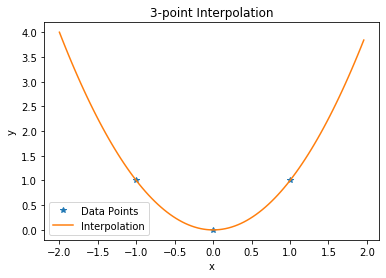

In [172]:
# 5: intrpf problem

# the associated code:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def intrpf(xi,x,y):
    """Function to interpolate between data points
    using Lagrange polynomial
    Inputs
      x   Vector of x coords of data pints (3 values)
      y   Vector of y coords
      xi  The x value where interpolation is computed
    Output
      yi  The interpolated value evaluated at xi
    """

    # calculate yi = p(xi) using Lagrange polynomial 
    yi = ((xi-x[1])*(xi-x[2])/((x[0]-x[1])*(x[0]-x[2]))) * y[0]\
        +((xi-x[0])*(xi-x[2])/((x[1]-x[0])*(x[1]-x[2]))) * y[1]\
        +((xi-x[0])*(xi-x[1])/((x[2]-x[0])*(x[2]-x[1]))) * y[2]
    return yi

# Initialize the data points 
x = np.empty(3)
y = np.empty(3)
for i in range(3):
    temp = np.array(eval(input("Enter pair (e.g., [1,2]): ")))
    x[i] = temp[0]
    y[i] = temp[1]
   
    
# Establish the range of interpolation
xr = np.array(eval(input("Enter range (e.g., [x_min,xmax]): ")))

# Find yi for xi using the function intrpf
nplot = 100
xi = np.empty(nplot)
yi = np.empty(nplot)
for i in range(nplot):
    xi[i] = xr[0] + (xr[1]-xr[0]) * i/float(nplot)
    yi[i] = intrpf(xi[i], x, y)
    

for j in range(len(y)):
    for i in range(len(yi)):
        if xi[i] == x[j]: 
            if j != 2:
                print("The slope at this point", [{x[j]}, {y[j]}], 'is :', (y[j + 1] - y[j]) / (x[j + 1] - x[j]))
                
            else:
                print("The slope at this point", [{x[j]}, {y[j]}], 'is :', (y[j] - y[j - 1]) / (x[j] - x[j - 1]))
                      
# Plot the curve
plt.plot(x,y,'*',xi,yi,'-', )
plt.title("3-point Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data Points','Interpolation'])
plt.show()

6. Newman 2.9: The Madelung Constant $-$ Write a program to calculate and print the Madelung constant for sodium chloride. Use as large a value of $L$ as you can, while still having your program run in a reasonable time$-$ say in a minute or less.

In [28]:
# 6: Calculating the Madelung Constant for NaCl

import numpy as np

L = 100 # number of atoms in all directions

madelung_1 = 0.0

for i in range(1, (L+1)): # L+1 to include endpoint
    madelung_1 = madelung_1 + ((-1.0) ** (i + 1)) / np.sqrt(i**2)

madelung_2 = 0.0

for i in range(1, (L+1)):
    for j in range(1, (L+1)):
        madelung_2 = madelung_2 + ((-1.0) ** (i + j + 1)) / np.sqrt((i**2)+(j**2))

madelung_3 = 0.0

for i in range(1, (L+1)):
    for j in range(1, (L+1)):
        for k in range(1, (L+1)):
            madelung_3= madelung_3 +((-1.0) ** (i + j + k + 1)) / np.sqrt((i**2)+(j**2)+(k**2))
                                                            
            madelung_constant = ((6*m1) + (12*m2) + (8*m3))

print('Madelung Constant for NaCl =', madelung_constant)

Madelung Constant for NaCl = 1.7418198158360134


---

7. Newman 2.10: The Semi-Empirical Mass Formula <br>
$a)$ Write a program that takes as its input the values of $A$ and $Z$, and prints out the binding energy for the corresponding atom. Use your program to find the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The correct answer is around 500 MeV.) <br>
<br>
$b)$ Modify your program to print out not the total binding energy, $B$, but the binding energy per nucleon, which is $B/A$. <br>
<br>
$c)$ Now modify your program so that it takes as input just a single value of the atomic number $Z$ and then goes through all the values of $A$ from $A = Z$ to $A = 3Z$, to find the one that has the largest bindding energy per nucleon. This is the most stable nucleus witht he given atomic number. Have your program print out the value of $A$ for this most stable nucleus and the value of the binding energy per nucleon. <br>
<br>
$d)$ Modify your program again so that, instead of taking $Z$ as imput, it runs through all values of $Z$ from $1$ to $100$ and prints out the most stable vaue of $A$ for each one. At what value of $Z$ does the maximum binding energy per nucleon occur? (The true answer, in real life, is $Z = 28$, which is nickel.)


In [54]:
# 7: The Semi-Empirical Mass Formula - a)

import numpy as np

# First, define variables for the formula:

two_thirds = 2 / 3.
one_third = 1 / 3.

A = eval(input('Enter the atomic mass: '))
Z = eval(input('Enter the number of protons: '))

# Now, define a function that will calculate binding energy using the semi-empirical mass formula:

def binding_energy(A, Z, a1, a2, a3, a4, a5):
    return (a1*A) - (a2*A**(two_thirds)) - (a3*((Z**2)/(A**(one_third)))) - (a4*(((A-2*Z)**(2)/A))) + (a5*(1/np.sqrt(A))) # [MeV]

be = binding_energy(A, Z, 15.8, 18.3, 0.714, 23.2, 12.0) # values of a1, a2, a3, a4, & a5 from textbook.

print('Binding Energy =', be, "MeV")

Enter the atomic mass: 58
Enter the number of protons: 28
Binding Energy = 497.5620206224374 MeV


In [16]:
# 7: The Semi-Empirical Mass Formula - b)

two_thirds = 2 / 3.
one_third = 1 / 3.

A = eval(input('Enter the atomic mass: '))
Z = eval(input('Enter the number of protons: '))

# Now, define a function that will calculate binding energy using the semi-empirical mass formula:

def binding_energy(A, Z, a1, a2, a3, a4, a5):
    return (a1*A) - (a2*A**(two_thirds)) - (a3*((Z**2)/(A**(one_third)))) - (a4*(((A-2*Z)**(2)/A))) + (a5*(1/np.sqrt(A))) # [MeV]

be = binding_energy(A, Z, 15.8, 18.3, 0.714, 23.2, 12.0) # values of a1, a2, a3, a4, & a5 from textbook.

# Now when printing, simply print be/A to get binding energy per nucleon:

print('Binding Energy per Nucleon =', be/A, "MeV")

Enter the atomic mass: 58
Enter the number of protons: 28
Binding Energy per Nucleon = 8.578655527973059 MeV


In [1]:
# 7: The Semi-Empirical Mass Formula - c)

import numpy as np

# First, define variables for the formula:

two_thirds = 2 / 3.
one_third = 1 / 3.

Z = eval(input('Enter the atomic mass: '))
#A = np.arange(Z, ((3*Z) + 1), 1) # 3Z + 1 to include endpoint ### commented out as it was easier to define A in
#                                                                  the for loop below

A_Max = 0 # set a variable for a maximum value of A

# Now, define a function that will calculate binding energy per nucleon using the semi-empirical mass formula:

def binding_energy_nucleon(A, Z, a1, a2, a3, a4, a5):
    return ((a1*A) - (a2*A**(two_thirds)) - (a3*((Z**2)/(A**(one_third)))) - (a4*(((A-2*Z)**(2)/A))) + (a5*(1/np.sqrt(A)))) / A # [MeV]

# for loop to check for even/oddness of A and Z to set a5 value:
# then calculate binding energy per nucleon

for A in range(Z, 3*Z):
    if ((A % 2 == 0) and (Z % 2 == 1)): a5 = -12.0
    elif (A % 2 == 1): a5 = 0
    elif ((A % 2 == 0) and (Z % 2 == 0)): a5 = 12.0
        
    be2 = binding_energy_nucleon(A, Z, 15.8, 18.3, 0.714, 23.2, a5)
    
    if be2 > A_Max:
        A_Max = A

print("The most stable value of A =", A+1, "Highest binding energy per nuclueon =", be2)

Enter the atomic mass: 58
The most stable value of A = 174 Highest binding energy per nuclueon = 7.505550531461291


In [171]:
# 7: The Semi-Empirical Mass Formula - d)

import numpy as np

# First, define variables for the formula:

two_thirds = 2 / 3.
one_third = 1 / 3.

A_max = 0.0
A_max2 = 0.0

# Now, define a function that will calculate binding energy per nucleon using the semi-empirical mass formula:

def binding_energy_nucleon(A, Z, a1, a2, a3, a4, a5):
    return ((a1*A) - (a2*A**(two_thirds)) - (a3*((Z**2)/(A**(one_third)))) - (a4*(((A-2*Z)**(2)/A))) + (a5*(1/np.sqrt(A)))) / A # [MeV]

# for loop to check for even/oddness of A and Z to set a5 value:
# then calculate binding energy per nucleon

for Z in range(1, 101):
    for A in range(Z, ((3*Z)+1)):
        if ((A % 2 == 0) and (Z % 2 == 1)): a5 = -12.0
        elif (A % 2 == 1): a5 = 0
        elif ((A % 2 == 0) and (Z % 2 == 0)): a5 = 12.0
        
        be3 = binding_energy_nucleon(A, Z, 15.8, 18.3, 0.714, 23.2, a5) 
    
        if be3 > A_max:
            A_max = be3
            A_max2 = Z
        
    print('The most stable value of A =', A_max, 'with the associated value Z =', Z, 'with the highest binding energy per nucleon =', be3, '[MeV]')

print('Value of Z where the maximum binding energy per nucleon occurs =', A_max2) # whoop, it actually is 28
    



The most stable value of A = 0.36869091831015827 with the associated value Z = 1 with the highest binding energy per nucleon = 0.36869091831015827 [MeV]
The most stable value of A = 5.321930578649441 with the associated value Z = 2 with the highest binding energy per nucleon = 3.7058877989423666 [MeV]
The most stable value of A = 5.321930578649441 with the associated value Z = 3 with the highest binding energy per nucleon = 4.081244445613872 [MeV]
The most stable value of A = 6.466330085889912 with the associated value Z = 4 with the highest binding energy per nucleon = 5.1018118032654245 [MeV]
The most stable value of A = 6.650123444727665 with the associated value Z = 5 with the highest binding energy per nucleon = 5.319414429307185 [MeV]
The most stable value of A = 7.200918138809924 with the associated value Z = 6 with the highest binding energy per nucleon = 5.851716203455191 [MeV]
The most stable value of A = 7.330860591990981 with the associated value Z = 7 with the highest bind

---

8. Newman 3.1: Plotting Experimental Data <br>
$a)$ Write a program that reads in the data and makes a graph of sunspots as a function of time. <br>
<br>
$b)$ Modify your program to display only the first $1000$ data poitns on the graph. <br>
<br>
$c)$ Modify your program further to calculate and plot the running average of the data, defined by $$Y_k = \frac{1}{2r+1} \sum_{m=-r}^{r} y_{k+m}$$ where $r = 5$ in this case (and the $y_k$ are the sunspot numbers). Have the program plot both the original data and the running average on the same graph, again over the range covered by the first $1000$ data points.

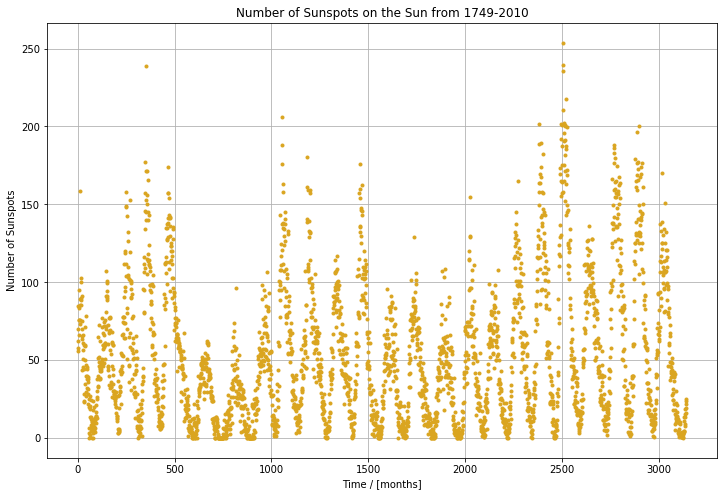

In [21]:
# 8: Plotting Experimental Data - a)

import numpy as np
import matplotlib.pyplot as plt

# Load the necessary data file:

data = np.loadtxt('sunspots.txt')

# Assign the two columns of data:

month = data[:,0]
sunspot_number = data[:,1]

# Now plot sunspots as function of time:

fig = plt.figure(figsize=[12,8])
plt.plot(month, sunspot_number, '.', color = 'goldenrod')
plt.title('Number of Sunspots on the Sun from 1749-2010')
plt.xlabel('Time / [months]')
plt.ylabel('Number of Sunspots')
plt.grid()
plt.show()

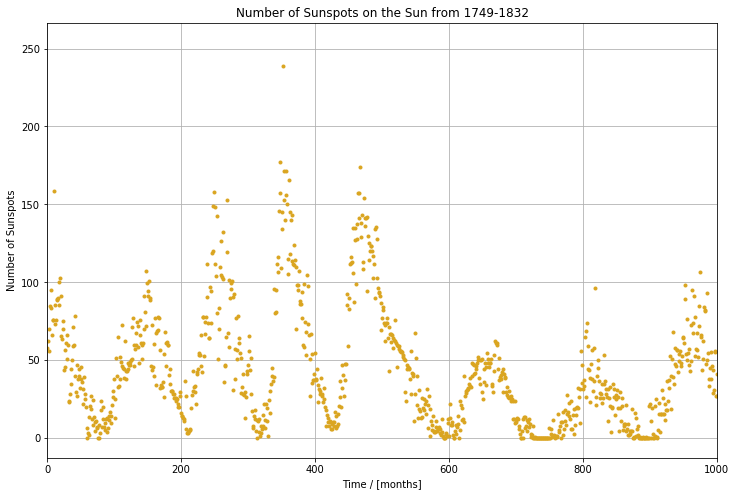

In [22]:
# 8: Plotting Experimental Data - b)

import numpy as np
import matplotlib.pyplot as plt

# Load the necessary data file:

data = np.loadtxt('sunspots.txt')

# Assign the two columns of data:

month = data[:,0]
sunspot_number = data[:,1]

# Now plot sunspots as function of time while using plt.xlim() to limit the number of data points to 1000:

fig = plt.figure(figsize=[12,8])
plt.xlim(0, 1000)
plt.plot(month, sunspot_number, '.', color = 'goldenrod')
plt.title('Number of Sunspots on the Sun from 1749-1832')
plt.xlabel('Time / [months]')
plt.ylabel('Number of Sunspots')
plt.grid()
plt.show()

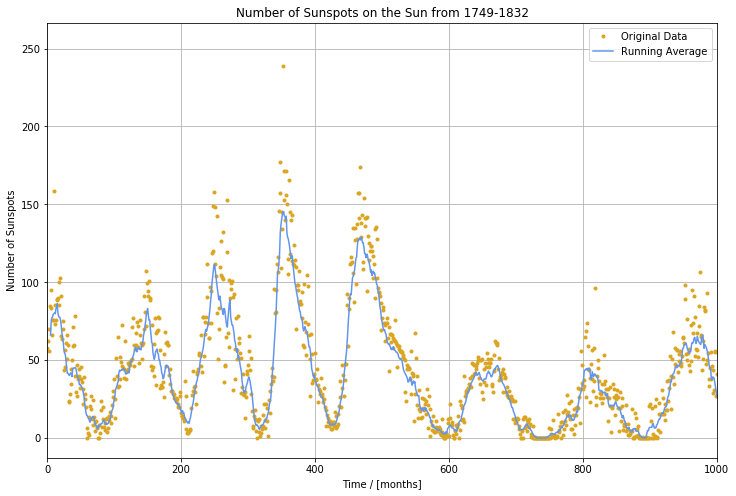

In [23]:
# 8: Plotting Experimental Data - c)

import numpy as np
import matplotlib.pyplot as plt

# Load the necessary data file:

data = np.loadtxt('sunspots.txt')

# Assign the two columns of data:

month = data[:,0]
sunspot_number = data[:,1]

# Now, define variable r and calculate running average:

r = 5

Y_list = [] # Creating an empty set to append Y values to

for i in range(r, len(month)-r):
    Y = ((1 / (2*r + 1)) * sum(data[i-r:i+r,1]))
    
    Y_list.append(Y)
    
fig = plt.figure(figsize=[12,8])
plt.xlim(0, 1000)
plt.plot(month, sunspot_number, '.', color = 'goldenrod', label = 'Original Data')
plt.plot(data[r:len(month)-r, 0], Y_list, '-', color = 'cornflowerblue', label = 'Running Average')
plt.title('Number of Sunspots on the Sun from 1749-1832')
plt.xlabel('Time / [months]')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.grid()
plt.show()

---

9. Newman 3.6: Deterministic Chaos and the Feigenbaum Plot $-$ Write a program that calculates and displays the behavior of the logistic map. Here's what you need to do. For a given value of $r$, start with $x = \frac{1}{2}$, and iterate the logistic map equation a thousand times. That will give it a chance to settle down to a fixed point or limit cicle if it's going to. Then run for another thousand iterations and plot the points $(r,x)$ on a graph where the horizontal axis is $r$ and the vertical axis is $x$. You can either use the `plot` function with the options `"ko"` or `"k."` to draw a graph with dots, one for each point, or you can use the `scatter` function to draw a scatter plot (which always uses dots). Repeat the whole calculation for values of $r$ from $1$ to $4$ in steps of $0.01$, plotting the dots for all values of $r$ on the same figure and then finally using the function `show` once to display the complete figure. <br>
<br>
Give answers to the following questions: <br>
$a)$ For a given value of $r$ what would a fixed point look like on the Feigenbaum plot? How about a limit cycle? And what would chaos look like? <br>
<br>
$b)$ Based on your plot, at what value of $r$ does the system move from orerly behavior (fixed points or limit cycles) to chaotic behavior? This point is sometimes called the "edge of chaos."

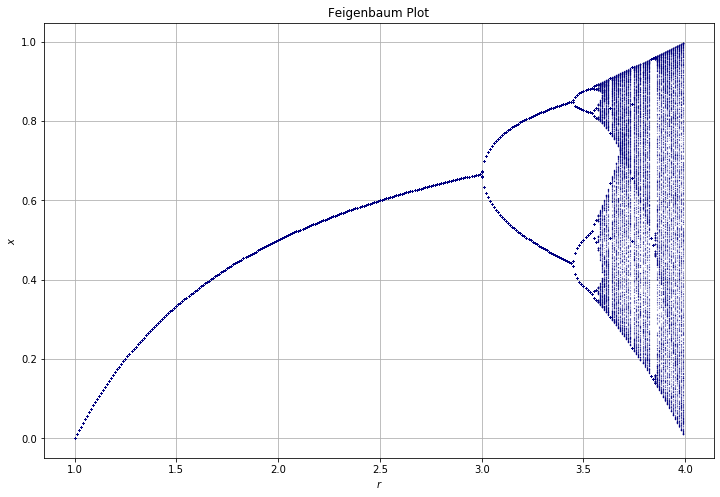

In [20]:
# 9: Deterministic Chaos and the Feigenbaum Plot

import numpy as np
import matplotlib.pyplot as plt

r = np.arange(1, 4, 0.01) # Given value
x = 0.5

r_values = [] # empty set to append r values to
x_values = [] # empty set to append x values to

iterations = 1000

for i in range(iterations):
    x = (r*x)*(1-x)

    
for i in range(iterations):
    x = (r*x)*(1-x)
    
    x_values.append(x)
    r_values.append(r)
    
    
    
fig = plt.figure(figsize=[12,8])
plt.plot(r_values, x_values, '.', markersize=0.2, color='navy')
plt.title('Feigenbaum Plot')
plt.xlabel('$r$')
plt.ylabel('$x$')
plt.grid()
plt.show()

$a)$ A fixed point would like the point at $x = 1.0$. The limit cycle would be all of the points from $ x = 1.0$ to $ x = 3.0$. Chaos begins at $x = 3.0$. <br>
<br>
$b)$ The value of $r$ where the system moves from orderly behavior to chaotic behavior is at $r = 3.0$. <br>
<br>


---


10. Newman 3.7: The Mandelbrot Set $-$ Write a program to make an image of the Mandelbrot set by performing the iteration for all values of $c = x + iy$ on an $N \times N$ grid spanning the region where $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$. Make a density plot in which grid points inside the Mandelbrot set are clolred black and those outside are colored white. The Mandelbrot set has a very distinctive shape that looks something like a beetle with a very long snout$-$ you'll know it when you see it. <br>
<br>
Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N-$perhaps $N = 100-$so that your program runs quickly while you are testing it. Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.

In [ ]:
# 10: The Mandelbrot Set

import numpy as np
import matplotlib.pyplot as plt

# set some variables:

N = 1200
niter = 100

# actually define our x and y:

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xx, yy = np.meshgrid(x, y) # this is creating a grid of c values from the formula

plot_grid = np.full([ N, N ], niter, int) # this is what we are actually going to plotting onto

z = np.zeros([N,N], complex) # setting our z to be the size we want

# now actually compute values with a for loop:

for n in range(0, niter):
    z = z**2 + xx + yy * 1j # imaginary number, i, is 1j in python
    for i in range(0, N):
        for j in range(0, N):
            if abs(z[i,j]) > 2:
                plot_grid[i,j] = n + 1
                                
fig = plt.figure(figsize=[12,8], dpi=600)
plt.imshow(plot_grid, extent =[-2,2,-2,2], cmap='twilight_shifted') # plot with a fun colormap! -- the tendrils look like snowflakes!
plt.colorbar()
plt.title('The Mandelbrot Set')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

/Users/michaelaallen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square
/Users/michaelaallen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in square
